In [219]:
import pandas as pd
import json
import copy

db = json.load(open('Surroundings.json'))

store_code_list = []
for i in range(len(db)):
    store_code_list.append(db[i]['store_code'])

surroundings_list = [*db[0]['surroundings'].keys()]

#count_dic = {store_code:{surroundings#:0}}
tmp1 = {}
for i in surroundings_list:
    tmp1[i] = 0

count_dic = {}
for i in store_code_list:
    dic_tmp = copy.deepcopy(tmp1)
    count_dic[i] = dic_tmp

for i in range(len(store_code_list)):
    for j in surroundings_list:
        count_dic[store_code_list[i]][j] = len(db[i]['surroundings'][j])

#pandas
list = surroundings_list + ['store_code']
dic = {}
for i in list:
    dic[i] = 0

list = []
for i in store_code_list:
    dic_tmp = copy.deepcopy(dic)
    dic_tmp['store_code'] = i
    for j in surroundings_list:
        dic_tmp[j] = count_dic[i][j]
    list.append(dic_tmp)

df = pd.DataFrame(list)
df.to_csv("output1.csv")

#sales_granular
df_sales = pd.read_csv('sales_granular.csv',index_col=0)
df_sales = df_sales.stack()
df_sales = df_sales.groupby('store_code').sum()
df_sales.to_csv("output2.csv")

print("END")

Hello
END


MSE train: 154972569.162, test: 912502161.568
R^2 train: 0.866, test: -0.207


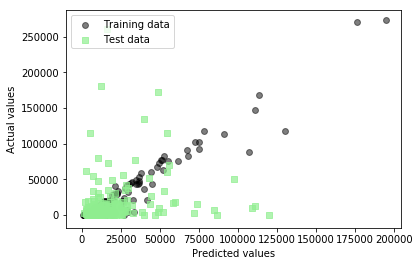

END


In [273]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('output3.csv',index_col=0)

X = df.iloc[:,1:]
y = df['sales']

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.5,random_state=1)


forest = RandomForestRegressor(n_estimators = 1000, criterion='mse',random_state = 1, n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f'% (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'% (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

df_importance = pd.DataFrame(forest.feature_importances_)
df_importance.to_csv("output_importance.csv")

plt.scatter(y_train_pred, y_train, c='black',marker='o',s=35, alpha=0.5,label='Training data')
plt.scatter(y_test_pred, y_test, c='lightgreen',marker='s',s=35, alpha=0.7,label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.show()

print('END')